In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('/content/forestfires.csv')

In [4]:
df.sample(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
224,sep,wed,90.1,82.9,735.7,6.2,15.4,57,4.5,0.0,...,0,0,0,0,0,0,0,0,1,large
445,aug,sun,94.0,47.9,100.7,10.7,17.3,80,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small
388,aug,fri,94.8,227.0,706.7,12.0,23.3,34,3.1,0.0,...,0,0,0,0,0,0,0,0,0,large
474,jun,thu,93.0,103.8,316.7,10.8,26.4,35,2.7,0.0,...,0,0,0,1,0,0,0,0,0,large
39,mar,tue,88.1,25.7,67.6,3.8,14.1,43,2.7,0.0,...,0,0,0,0,1,0,0,0,0,small


Data Description:

- month	month of the year: 'jan' to 'dec'
- day	day of the week: 'mon' to 'sun'
- FFMC	FFMC index from the FWI system: 18.7 to 96.20
- DMC	DMC index from the FWI system: 1.1 to 291.3
- DC	DC index from the FWI system: 7.9 to 860.6
- ISI	ISI index from the FWI system: 0.0 to 56.10
- temp	temperature in Celsius degrees: 2.2 to 33.30
- RH	relative humidity in %: 15.0 to 100
- wind	wind speed in km/h: 0.40 to 9.40
- rain	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie 	the burned area of the forest ( Small , Large)

In [5]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.shape

(517, 31)

In [8]:
df.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

dummy variables are directly created for our dataset
so either we can delete extra variables or we can select only required variables and can create dummy

In [9]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

## shows unbalanced dataset
we will improve the datasets at later stage

In [10]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

null values are not there => good

In [42]:
df.duplicated().sum()

8

In [43]:
df = df.drop_duplicates()

In [44]:
# drop columns for dimensionality reduction
df = df.drop(columns = ['month', 'day', 'daymon', 'monthjan'], axis = 1)

In [14]:
df.shape

(509, 27)

In [15]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr',
       'monthaug', 'monthdec', 'monthfeb', 'monthjul', 'monthjun', 'monthmar',
       'monthmay', 'monthnov', 'monthoct', 'monthsep', 'size_category'],
      dtype='object')

# Outliers checkup

<Axes: >

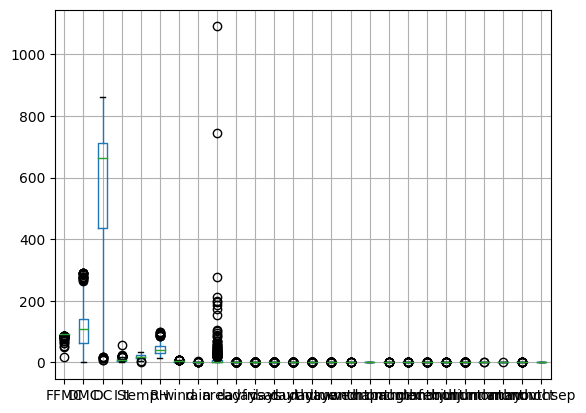

In [16]:
df.boxplot()

<Axes: >

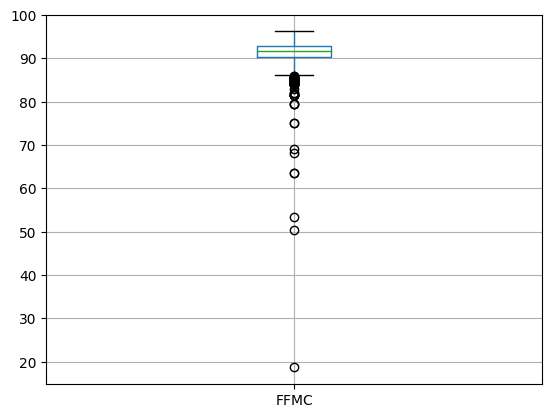

In [45]:
df[['FFMC']].boxplot()

<Axes: >

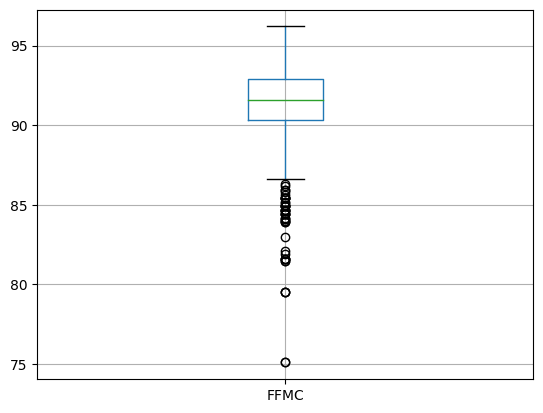

In [46]:
import numpy as np
# here we are taking 10 % and 90 % as deciding criteria
def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.1)
    Q3 = df_clean[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean[column] = np.where(df_clean[column] < lower_bound, df_clean[column].median(), df_clean[column])
    df_clean[column] = np.where(df_clean[column] > upper_bound, df_clean[column].median(), df_clean[column])
    return df_clean

df = remove_outliers_iqr(df, 'FFMC')
df[['FFMC']].boxplot()

<Axes: >

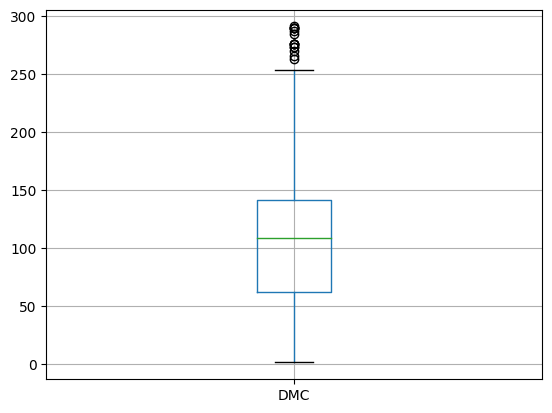

In [47]:
df[['DMC']].boxplot()

<Axes: >

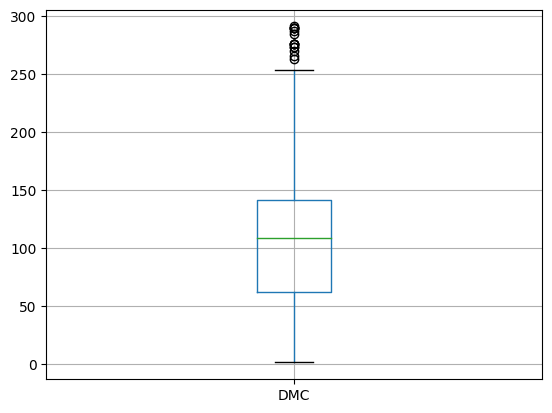

In [48]:
df = remove_outliers_iqr(df, 'DMC')
df[['DMC']].boxplot()

<Axes: >

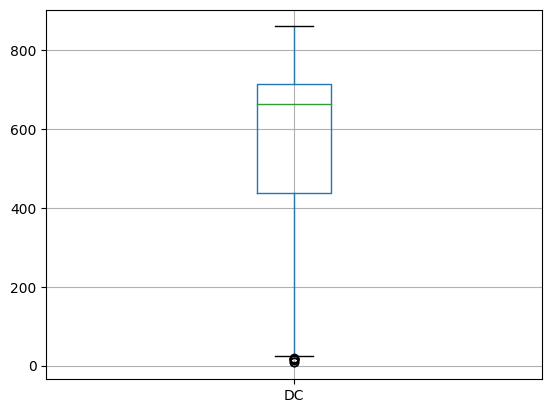

In [49]:
df[['DC']].boxplot()

<Axes: >

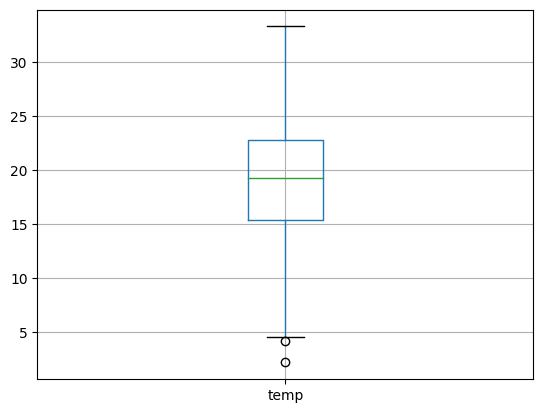

In [50]:
df[['temp']].boxplot()

<Axes: >

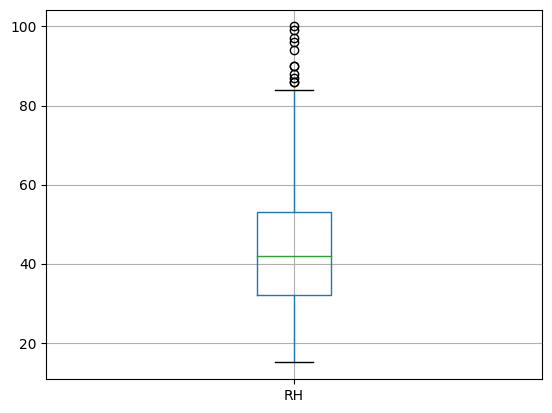

In [51]:
df[['RH']].boxplot()

<Axes: >

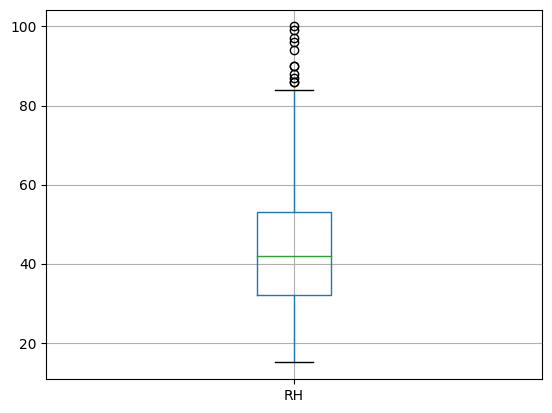

In [52]:
df = remove_outliers_iqr(df, 'RH')
df[['RH']].boxplot()

<Axes: >

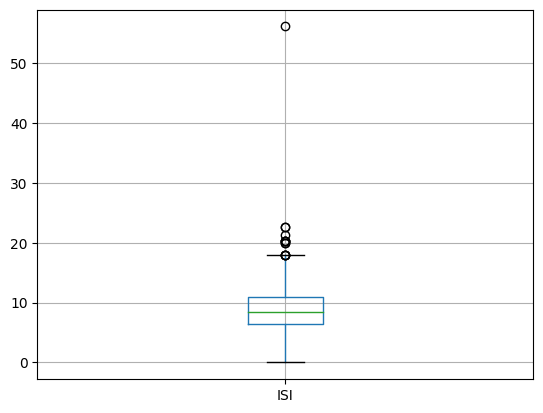

In [53]:
df[['ISI']].boxplot()

<Axes: >

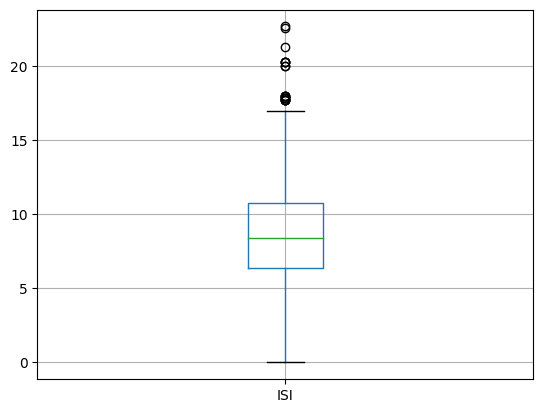

In [54]:
df = remove_outliers_iqr(df, 'ISI')
df[['ISI']].boxplot()

<Axes: >

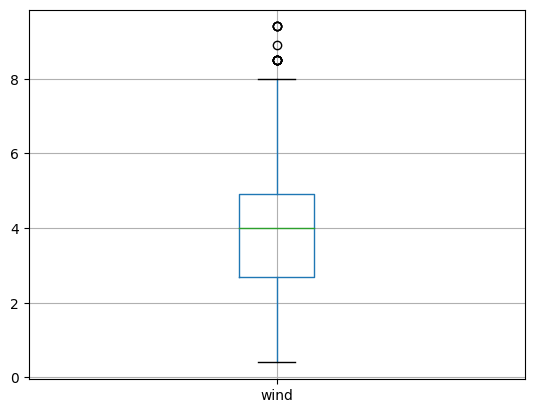

In [55]:
df[['wind']].boxplot()

<Axes: >

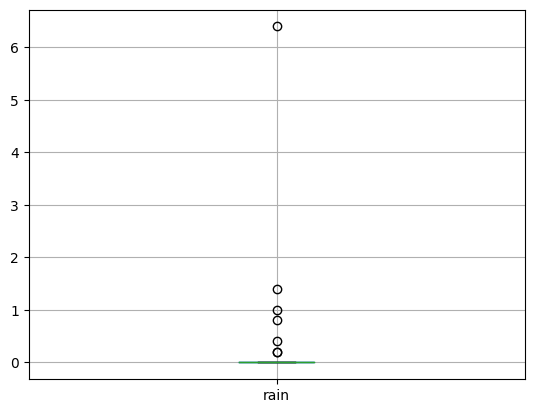

In [56]:
df[['rain']].boxplot()

<Axes: >

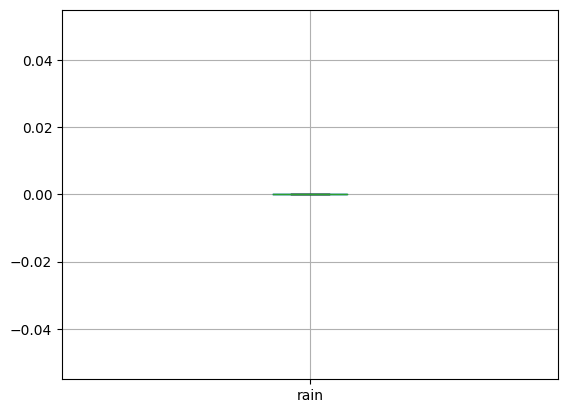

In [57]:
df = remove_outliers_iqr(df, 'rain')
df[['rain']].boxplot()

<Axes: >

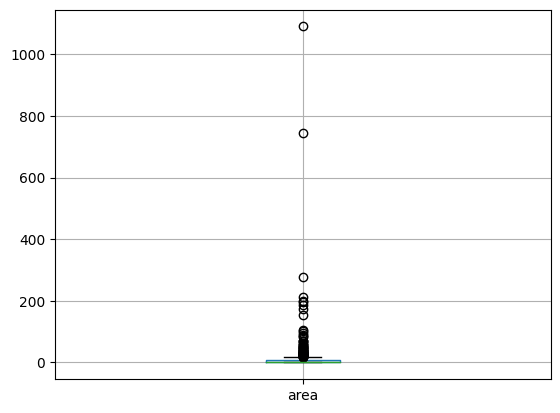

In [58]:
df[['area']].boxplot()

<Axes: >

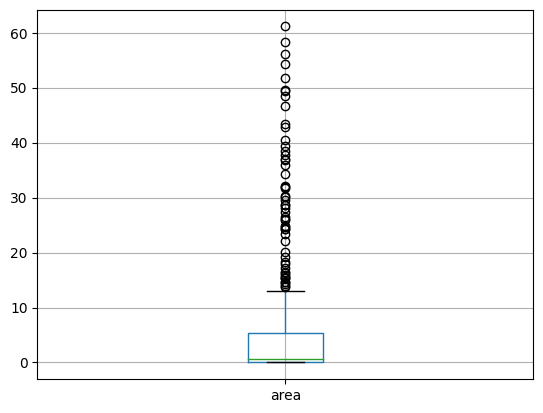

In [59]:
df = remove_outliers_iqr(df, 'area')
df[['area']].boxplot()

<Axes: >

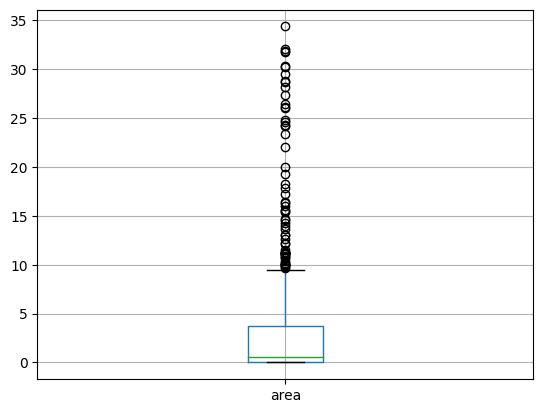

In [60]:
df = remove_outliers_iqr(df, 'area')
df[['area']].boxplot()

### all the outliers are taken care off

In [61]:
# label encoding for output
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])

df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


# Model Building

In [62]:
X= df.drop('size_category', axis=1)
y= df.size_category

y.value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [63]:
# need oversampling after train-test split
# though we do not require to split as testing data is already available to us, so here we will keep test size very less

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# oversapmling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 298, 1: 298})


In [65]:
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled)

In [66]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001] }]

grid = GridSearchCV(estimator=SVC(), cv=5, param_grid=param_grid, verbose = 300)
grid.fit(X_resampled, y_resampled)
grid.score(X_resampled, y_resampled)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 1/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.800 total time=  18.2s
[CV 2/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 2/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.874 total time=  12.3s
[CV 3/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 3/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.882 total time=  14.7s
[CV 4/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 4/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.891 total time=  13.3s
[CV 5/5; 1/18] START C=10, gamma=0.5, kernel=linear.............................
[CV 5/5; 1/18] END C=10, gamma=0.5, kernel=linear;, score=0.933 total time=  30.2s
[CV 1/5; 2/18] START C=10, gamma=0.5, kernel=rbf................................
[CV 1/5; 2/18] END .C=10, gamma=0.5, k

0.8976510067114094

In [67]:
grid.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'linear'}

In [68]:
grid.best_score_

0.8759663865546218

In [69]:
model = SVC(kernel='linear', C=10, gamma=0.5)

model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

model.score(X_resampled, y_resampled), model.score(X_test, y_test)

(0.8976510067114094, 0.8627450980392157)

In [70]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.66      0.73        29
     class 1       0.87      0.95      0.91        73

    accuracy                           0.86       102
   macro avg       0.85      0.80      0.82       102
weighted avg       0.86      0.86      0.86       102



Text(0.5, 1.0, 'Confusion Matrix')

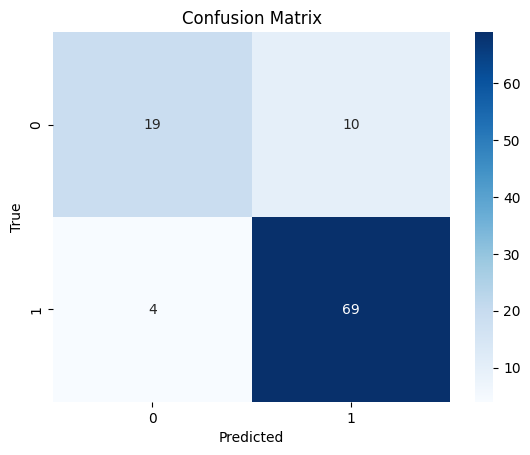

In [71]:
from sklearn.metrics import confusion_matrix

conf_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

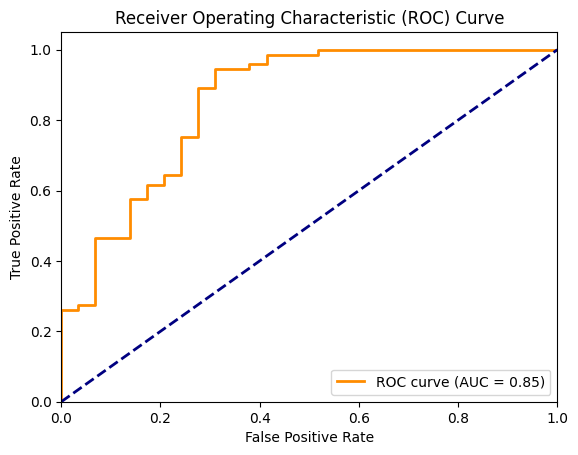

In [72]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 0, 'Feature 3')

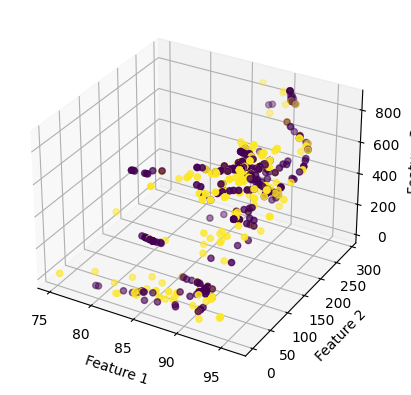

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming X contains your 8 features
ax.scatter(X_resampled.iloc[:, 0], X_resampled.iloc[:, 1], X_resampled.iloc[:, 2], c = y_resampled)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# ---------------------------------------------------------------------------------------